**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [ ]:
# Import necessary statements 
from sklearn import preprocessing
import sklearn
import random
from numpy.random import permutation
import pandas as pd
import numpy as np 
from math import sqrt 
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import math
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
# To read data from diamonds.csv

headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('/content/sample_data/diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
regression_data=data
#data = data[:200]
data.describe()
#print(data) 

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
unique,273,5,7,8,184,127,11602,554,552,375
top,0.3,Ideal,G,SI1,62,56,605,4.37,4.34,2.7
freq,2604,21551,11292,13065,2239,9881,132,448,437,767


In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.2,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75




```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [ ]:
# Preprocessing and encoding of categorical values 

# the follwoing label encoding is referred from sklearn documentation of preprocessing
# some of the code is referred from `https://stackoverflow.com/questions/45983972/labelencoder-wont-store-parameters`

encode=preprocessing.LabelEncoder()

encode.fit_transform(data['cut'])
keys = encode.classes_
values = encode.transform(encode.classes_)
cut_dict = dict(zip(keys, values))
data['cut'] = data['cut'].map(cut_dict)

encode1=preprocessing.LabelEncoder()

encode1.fit_transform(data['clarity'])
keys = encode1.classes_
values = encode1.transform(encode1.classes_)
clarity_dict = dict(zip(keys, values))
data['clarity'] = data['clarity'].map(clarity_dict)

color_dict = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
data['color'] = data['color'].map(color_dict)





In [ ]:
# some of the procedure for train validity and cross is referred  from the following site
#https://www.journaldev.com/45109/normalize-data-in-python

data=sklearn.utils.shuffle(data, random_state = 0)

scaler=preprocessing.MinMaxScaler()

names=data.columns

d=scaler.fit_transform(data)

scaled_df=pd.DataFrame(d,columns=names)

scaled_df.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.187110,0.50,0.333333,0.428571,0.527778,0.230769,0.238255,0.615456,0.112903,0.129245
1,0.226611,0.50,0.333333,0.285714,0.544444,0.250000,0.329675,0.648045,0.117657,0.136792
2,0.207900,0.75,0.166667,0.285714,0.502778,0.288462,0.280262,0.640596,0.115450,0.131447
3,0.270270,0.50,0.666667,0.285714,0.497222,0.250000,0.456506,0.691806,0.124958,0.141509
4,0.145530,1.00,0.666667,0.714286,0.519444,0.269231,0.225280,0.574488,0.105433,0.120126


In [ ]:
X=scaled_df.drop(['price'], axis = 1).values   # getting the predicatble column price 

Y=scaled_df['price'].values

train=X[:-1000]

validate=X[-1000:]

train_Y=Y[:-1000]

validate_Y=Y[-1000:]


#train, validate, test = np.split(X, [int(.6*len(scaled_df)), int(.8*len(scaled_df))])

#train_Y, validate_Y, test_Y = np.split(Y, [int(.6*len(scaled_df)), int(.8*len(scaled_df))])

#print(train)


In [ ]:
XL=X
YL=Y

In [ ]:
# code for knn regression
# run for different k's and store the pred of all the k's and find the mean squared error or MAE 
# some of the code is referred from https://machinelearningmastery.com/distance-measures-for-machine-learning/

class KnnRegressor():

    def __init__(self,neighbors_k=5,metric='euclidean'):

      self.neighbors_k=neighbors_k
      self.metric=metric

    def calculate_distance(self,row1,row2):


      if self.metric=="euclidean":
        return sqrt(sum((element1-element2)**2 for element1,element2 in zip(row1,row2)))

      
      if self.metric=="manhatten":
        return sum(abs(element1-element2) for element1,element2 in zip(row1,row2))

    def calculate_mean(self,ind,target):

      
      temp=[]
      for i in ind:

        temp.append(target[i])
    
      values=np.array(temp)
 
      return np.mean(values)


    ### need to implement hamming I could not understand how to implement hamming

    def predict(self,train,test,target):
      
      Y=[]
      
      for p in test:
        temp=[]
        for q in train:
          temp.append(self.calculate_distance(p,q))
        distances_array=np.array(temp)

      
        # now we need to sort and pick the top k
        k=self.neighbors_k
        ind=np.argsort(distances_array)[:k]
        
      
        pred_i=self.calculate_mean(ind,target)
        Y.append(pred_i)

      Y_pred=np.array(Y)
      
      return Y_pred


In [ ]:
def MSE(Y_pred,Y_known):
  return sum(abs(e1-e2)**2 for e1,e2 in zip(Y_pred,Y_known))/len(Y_known)

def MAE(Y_pred,Y_known):
  return sum(abs(e1-e2) for e1,e2 in zip(Y_pred,Y_known))/len(Y_known)

def R_squared(Y_pred,Y_known):  # co efficient of determination
  mean_value_known= np.mean(Y_known)
  #print("Mean_vlaue=============="+str(mean_value_known))
  SS_tot=sum(abs(e1-mean_value_known)**2 for e1 in Y_known)
  #print("SS_tot=============="+str(SS_tot))
  SS_res=sum(abs(e1-e2)**2 for e1,e2 in zip(Y_pred,Y_known))
  #print("SS_res=============="+str(SS_res))
  r_2=(1-(SS_res/SS_tot))
  return r_2
'''
def R_squared(y_pred,y_true):
  SS_res=((y_true - y_pred) ** 2).sum(axis=0,dtype=np.float64)
  SS_tot=((y_true - np.average(y_true, axis=0)) ** 2).sum(axis=0,dtype=np.float64)

  return (1-(SS_res/SS_tot))
'''
def RMSE(Y_pred,Y_known):
  return sqrt(sum(abs(e1-e2)**2 for e1,e2 in zip(Y_pred,Y_known))/len(Y_known))


def plot_performance(neighbors,cv_accuracy):

  #---------------------------------------------------------------------------------------
  #https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn
  #Generate plot
  #---------------------------------------------------------------------------------------
  plt.title('k-NN Varying number of neighbors')
  plt.plot(neighbors,cv_accuracy, label='validation AUC')
  plt.legend()
  plt.xlabel('Hyper parameter')
  plt.ylabel('R2_values')
  plt.show()



1. b) Do we need to normalise data? [If so Does it make any difference?].


In [ ]:
# give proper explanation
'''Yes we need normalisation.When we observe the values in the dataset the carat values 
are less than 1 like 0.23,0.22 etc., and the price values are very large compared to other
ns. Since Knn is a distance based algorithm, when we find the euclidean/manhatten distance 
um values are predominantly determined by the price and other such features with large
values and the classication and regression becomes difficult since everything will be
near in that case. So to bring everything to fairness It is better to normalise each 
feature.'''

'Yes we need normalisation.When we observe the values in the dataset the carat values \nare less than 1 like 0.23,0.22 etc., and the price values are very large compared to other\nns. Since Knn is a distance based algorithm, when we find the euclidean/manhatten distance \num values are predominantly determined by the price and other such features with large\nvalues and the classication and regression becomes difficult since everything will be\nnear in that case. So to bring everything to fairness It is better to normalise each \nfeature.'

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [ ]:
# show all the experiments

myList = list(range(0,12))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors.append(16)


knn=KnnRegressor(5,'manhatten')

pred_y=knn.predict(train,validate,train_Y)

# minkowski when p=1 (manhatten distance)
MAE_p1=MAE(pred_y,validate_Y)
MSE_p1=MSE(pred_y,validate_Y)
r2_p1=R_squared(pred_y,validate_Y)

# minkowski when p=2 (euclidean distance)
knn=KnnRegressor(5,'euclidean')
pred_y=knn.predict(train,validate,train_Y)
MAE_p2=MAE(pred_y,validate_Y)
MSE_p2=MSE(pred_y,validate_Y)

r2_p2=R_squared(pred_y,validate_Y)


I did not experiment with hamming distance. I don't fee it useful in this context.

3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [ ]:
# report a table

# Reference: https://zetcode.com/python/prettytable/#:~:text=PrettyTable%20is%20a%20Python%20library,in%20the%20PostgreSQL%20shell%20psql.&text=PrettyTable%20can%20read%20data%20from,data%20in%20ASCII%20or%20HTML.
x = PrettyTable()
print("For k=5")
x.field_names = ["distance","MSE", "MAE", "R2"]
x.add_row(["manhatten",MSE_p1,MAE_p1,r2_p1])
x.add_row(["euclidean",MSE_p2,MAE_p2,r2_p2])

print(x)


For k=5
+-----------+-----------------------+----------------------+--------------------+
|  distance |          MSE          |         MAE          |         R2         |
+-----------+-----------------------+----------------------+--------------------+
| manhatten | 0.0014837275598702643 | 0.019890749851327244 | 0.9712423807503101 |
| euclidean |  0.001626816793521492 | 0.021325998810617967 | 0.9684690240968611 |
+-----------+-----------------------+----------------------+--------------------+


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

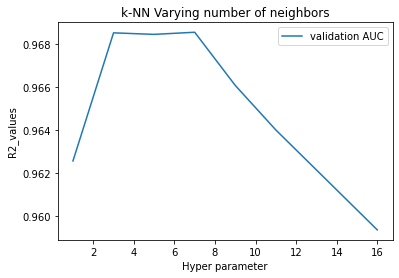

In [ ]:
# plot

MAE_CV_accuracy=np.empty(len(neighbors))
MSE_CV_accuracy=np.empty(len(neighbors))
r_2_CV_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):

  knn=KnnRegressor(k,'euclidean')

  pred_y=knn.predict(train,validate,train_Y)

  #MAE_CV_accuracy.append(MAE(pred_y,validate_Y)
  #MSE_CV_accuracy.append(MSE(pred_y,validate_Y)

  r_2_CV_accuracy[i]=R_squared(pred_y,validate_Y)

  #print(r_2_CV_accuracy)

plot_performance(neighbors,np.array(r_2_CV_accuracy))

In [ ]:
k=5
knn=KnnRegressor(k,'euclidean')
pred_y_knn=knn.predict(train,validate,train_Y)

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

In [ ]:
# Explanation:
'''R-squared errors are not same as k increases R-squared value also increases and
later as k crosses certain values the r-squared value also declines indicating 
that the performance is degenerating. Usually when error is employed as a measure
we chose the minima point as k( The k value for which error is less). 
In our above case since we employed R1_squared as the score. 
So, we choose the k at which score is maximum i.e wither 5 or 7 in our case. We should 
pick k such that it is odd and it is less than the value sqrt(n)'''

'R-squared errors are not same as k increases R-squared value also increases and\nlater as k crosses certain values the r-squared value also declines indicating \nthat the performance is degenerating. Usually when error is employed as a measure\nwe chose the minima point as k( The k value for which error is less). \nIn our above case since we employed R1_squared as the score. \nSo, we choose the k at which score is maximum i.e wither 5 or 7 in our case. We should \npick k such that it is odd and it is less than the value sqrt(n)'

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

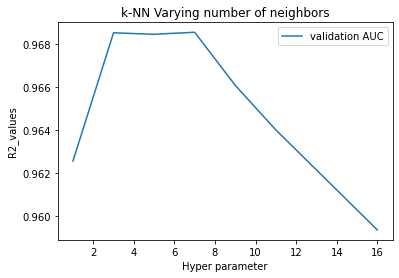

In [ ]:
# scikit-learn KNN Regressor
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
cv_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):

  knn = KNeighborsRegressor(n_neighbors=k,p=2)

  # fitting the model on crossvalidation train
  knn.fit(train, train_Y)
  #Compute accuracy on the training set
  pred = knn.predict(validate)
  cv_accuracy[i] = knn.score(validate, validate_Y)


plot_performance(neighbors,np.array(cv_accuracy))

5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [ ]:
# Comparison
'''From the above two graphs we can conclude that r2-squared scores are very similar.
Complexities and the running time is also similar to that of sklearns algorithm'''


'From the above two graphs we can conclude that r2-squared scores are very similar.\nComplexities and the running time is also similar to that of sklearns algorithm'

6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


In [ ]:
# report this  along with the experiments

'''
Advantages:
1)Knn does not require any training. It justs stores the training data 
2)We can new add new data as in required.
3)It is simple and very easy to understand and implement.
4)We can employ any accuracy measuring scheme it works well with all of them.

Disadvantages:
1)It is computationally time taking.
2)We need to normalise the data before applying the algorithm other wise the results will 
unexpected.
3)It is sensitive to noisy data or outliers. consider if the k value is small and it
 is surrounded by noisy data then it's classification will be erroneous.
'''


"\nAdvantages:\n1)Knn does not require any training. It justs stores the training data \n2)We can new add new data as in required.\n3)It is simple and very easy to understand and implement.\n4)We can employ any accuracy measuring scheme it works well with all of them.\n\nDisadvantages:\n1)It is computationally time taking.\n2)We need to normalise the data before applying the algorithm other wise the results will \nunexpected.\n3)It is sensitive to noisy data or outliers. consider if the k value is small and it\n is surrounded by noisy data then it's classification will be erroneous.\n"

# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


In [11]:
# Import necessary statements 
from sklearn import preprocessing
import sklearn
import random
from numpy.random import permutation
import pandas as pd
import numpy as np 
from math import sqrt 
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import math
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [12]:
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('/content/sample_data/diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
regression_data=data
#data = data[:200]
data.describe()
#print(data) 

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
unique,273,5,7,8,184,127,11602,554,552,375
top,0.3,Ideal,G,SI1,62,56,605,4.37,4.34,2.7
freq,2604,21551,11292,13065,2239,9881,132,448,437,767


In [13]:
# Preprocessing and encoding of categorical values 

# the follwoing label encoding is referred from sklearn documentation of preprocessing
# some of the code is referred from `https://stackoverflow.com/questions/45983972/labelencoder-wont-store-parameters`

encode=preprocessing.LabelEncoder()

encode.fit_transform(data['cut'])
keys = encode.classes_
values = encode.transform(encode.classes_)
cut_dict = dict(zip(keys, values))
data['cut'] = data['cut'].map(cut_dict)

encode1=preprocessing.LabelEncoder()

encode1.fit_transform(data['clarity'])
keys = encode1.classes_
values = encode1.transform(encode1.classes_)
clarity_dict = dict(zip(keys, values))
data['clarity'] = data['clarity'].map(clarity_dict)

color_dict = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
data['color'] = data['color'].map(color_dict)



# some of the procedure for train validity and cross is referred  from the following site
#https://www.journaldev.com/45109/normalize-data-in-python

data=sklearn.utils.shuffle(data, random_state = 0)

scaler=preprocessing.MinMaxScaler()

names=data.columns

d=scaler.fit_transform(data)

scaled_df=pd.DataFrame(d,columns=names)

scaled_df.head()


X=scaled_df.drop(['price'], axis = 1).values   # getting the predicatble column price 

Y=scaled_df['price'].values

train=X[:-1000]

validate=X[-1000:]

train_Y=Y[:-1000]

validate_Y=Y[-1000:]


#train, validate, test = np.split(X, [int(.6*len(scaled_df)), int(.8*len(scaled_df))])

#train_Y, validate_Y, test_Y = np.split(Y, [int(.6*len(scaled_df)), int(.8*len(scaled_df))])

#print(train)

2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [15]:
def plot_performance_regression(learning_rates,mse_values):

  #---------------------------------------------------------------------------------------
  #https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn
  #Generate plot
  #---------------------------------------------------------------------------------------
  plt.title('Mean square error values based different learning rates')
  plt.plot(learning_rates,mse_values, label='Learning rate-lambda ')
  plt.legend()
  plt.xlabel('HYper parameter lambda ')
  plt.ylabel('MSE Values')
  plt.show()



def MSE(Y_pred,Y_known):
  return sum(abs(e1-e2)**2 for e1,e2 in zip(Y_pred,Y_known))/len(Y_known)

def MAE(Y_pred,Y_known):
  return sum(abs(e1-e2) for e1,e2 in zip(Y_pred,Y_known))/len(Y_known)

def R_squared(Y_pred,Y_known):  # co efficient of determination
  mean_value_known= np.mean(Y_known)
  #print("Mean_vlaue=============="+str(mean_value_known))
  SS_tot=sum(abs(e1-mean_value_known)**2 for e1 in Y_known)
  #print("SS_tot=============="+str(SS_tot))
  SS_res=sum(abs(e1-e2)**2 for e1,e2 in zip(Y_pred,Y_known))
  #print("SS_res=============="+str(SS_res))
  r_2=(1-(SS_res/SS_tot))
  return r_2
'''
def R_squared(y_pred,y_true):
  SS_res=((y_true - y_pred) ** 2).sum(axis=0,dtype=np.float64)
  SS_tot=((y_true - np.average(y_true, axis=0)) ** 2).sum(axis=0,dtype=np.float64)

  return (1-(SS_res/SS_tot))
'''
def RMSE(Y_pred,Y_known):
  return sqrt(sum(abs(e1-e2)**2 for e1,e2 in zip(Y_pred,Y_known))/len(Y_known))


In [16]:
# Reference :https://www.kaggle.com/arpandas65/simple-sgd-implementation-of-linear-regression
from sklearn.model_selection import train_test_split

class LinearRegression():

  def __init__(self,rate=0.01):

    self.b = 0
    
    self.r=rate

    self.X1=[]

    self.Y1=[]

    #self.w= np.random.normal(loc = 0.0 ,scale =1.0 ,size = (XL.shape[1],))

  def sgd(self,sample_array,rate):

    self.r=rate

    grad= [] #list to store the error difference which is used for dot product
    #K=10
    # Taking random sample from the data set
    
    #print(sample_array.shape[1])
    self.X1=sample_array[:,:X_train.shape[1]]
    self.Y1=sample_array[:,X_train.shape[1]]
    N=len(self.X1)
    
    for i in range(len(self.X1)):
      predict = np.array(self.X1[i]).dot(self.w) + self.b
      diff= self.Y1[i] -predict
      grad.append(diff)    # grad contains all the differences of pred and the actual values 
    
    grad=np.array(grad)# converting list to array for dot product implementation
    
    self.w = self.w - self.r*((-1/N)*np.dot(self.X1.T,grad))   # this is actually mini batch stochastic gradient 
    self.b = self.b - self.r*((-1/N)*np.sum(grad)) #  y_i=W^TX_i+b ==> b=(y_i-W^TX_i) therefore b= sum of all the errors 
    
    #return self.w ,self.b


  def fit(self,X_train,y_train,rate):
    self.w= np.random.normal(loc = 0.0 ,scale =1.0 ,size = (X_train.shape[1],))  # randomly choosing the weights or slopes withscale =1 that is normalised
    #self.w=w
    xy=np.column_stack((X_train,y_train))
    iterations=5000
    K=10
    for i in range(iterations):
      sample_array=xy[np.random.choice(xy.shape[0], K, replace=False), :] # if we replace the K with 1 then it becomes stochastic gradient descent 
      self.sgd(sample_array,rate)

    

  def predict(self,test):

    pred=[]
    for i in range(test.shape[0]):
      x = test[i]
      #y = self.Y1[i]
      pred.append((np.array(x.dot(self.w)) + self.b ))  #W^TX+b
    return np.array(pred)


  def get_coeff(self):
    return self.w ,self.b




In [20]:
# Reference :https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
XL=X
YL=Y
X_train, X_test, y_train, y_test  \
    = train_test_split(XL, YL, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val     \
    = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

#print(X_train.shape[0])   # usually shape of [0] returns the number of tuples and the shape of[1] returns the number of the dimensions.

learning_rates=list([0.01,0.001,0.1,0.02,0.3,0.03])

r=0.01       # it is the learning rate 
MSE_values=[]

regressor=LinearRegression()

for i in learning_rates:
  regressor.fit(X_train,y_train,r)
#print(regressor.get_coeff())


  y_pred=regressor.predict(X_test)
  MSE_values.append(MSE(y_pred,y_test))


#plot_performance_regression(np.array(learning_rates),np.array(MSE_values))



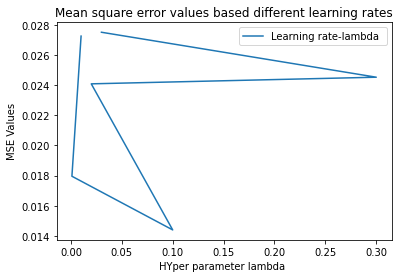

In [21]:
plot_performance_regression(np.array(learning_rates),np.array(MSE_values))

In [22]:
print(MSE_values)

[0.027249114405049246, 0.017960807141657438, 0.014403617595956292, 0.02408572495421019, 0.024525147195040967, 0.027505340176339942]


clearly we can see that learning rate of 0.001 is the best for calculating the weights

2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

In [23]:
#code for Correlation between features and the Diamond Price.
#Reference: https://analyticsindiamag.com/linear-regression-with-sklearn/
#temporary_frame=list(regression_data.columns.values.tolist())

corelation=[]
#print(X.shape[1])
for i in range(XL.shape[1]-1):
  col_x=XL[:,i]
  col_y=YL
  corr,_=pearsonr(col_x,col_y)
  corelation.append(corr)
  #if corr <-0.29 or corr>0.29:
  #  regression_data.drop(regression_data.columns[i], axis = 1, inplace = True) 

  

drop_col=[]    # contains the indices of the columns to be dropped 

for i in range(len(corelation)):
  if corelation[i]<-0.29 or corelation[i]>0.29:
    drop_col.append(i)


regression_data = pd.DataFrame(data=XL,index=np.array(range(1, XL.shape[0]+1)), \
      columns=np.array(range(1, XL.shape[1]+1))) 


regression_data.drop(regression_data.columns[drop_col], axis = 1, inplace = True) 

columns=list(data.columns.values.tolist())

columns.remove("price")
print(columns)

m=[columns[col] for col in drop_col]
print(" ".join(map(str,m))+ "  are the dropped columns")

X2=regression_data.values



Y2=YL
r=0.001


X_train, X_test, y_train, y_test  \
= train_test_split(X2, Y2, test_size=0.2, random_state=1)

#X_train, X_val, y_train, y_val     \
#= train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2



['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
carat x y  are the dropped columns


###Carat, X,Y columns are highly correlated with the target variable. So, we need to drop them from the data. I took limits for correlation as -0.29 and 0.29. We use other features for implementing the linear regression

In [24]:
#w= np.random.normal(loc = 0.0 ,scale =1.0 ,size = (X.shape[1],))
iterations=1000
regress=LinearRegression()
r=0.01
regress.fit(X_train,y_train,r)
print(regress.get_coeff())
#print(w_1.shape)
#print(X_test.shape)

y_pred=regress.predict(X_test)
MSE_value=MSE(y_pred,y_test)


print(MSE_value)

(array([ 0.05070733, -0.16114468, -0.12744623, -0.05147877,  0.06834457,
        0.56234071]), 0.27149732366729484)
0.040408450821083


Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [25]:
# import sklearn model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

#X_test = X_test.drop(['carat_sqrd','carat_exp'], axis = 1)

y_pred = reg.predict(X_test)

# store errors
sk_MSE_value=MSE(y_pred,y_test)


print(sk_MSE_value)

0.00912235916415631


In [26]:
y = PrettyTable()

y.field_names = ["Measure","LinearRegScratch", "Sklearn_reg"]
y.add_row(["MSE",MSE_value,sk_MSE_value])

print(y)

+---------+-------------------+---------------------+
| Measure |  LinearRegScratch |     Sklearn_reg     |
+---------+-------------------+---------------------+
|   MSE   | 0.040408450821083 | 0.00912235916415631 |
+---------+-------------------+---------------------+


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [27]:
X_train, X_test, y_train, y_test  \
= train_test_split(X, Y, test_size=0.2, random_state=1)

reg_whole = LinearRegression()
reg_whole.fit(X_train, y_train)

#X_test = X_test.drop(['carat_sqrd','carat_exp'], axis = 1)

y_pred_reg = reg_whole.predict(X_test)

# store errors
sk_MSE_value_whole=MSE(y_pred_reg,y_test)


print(sk_MSE_value_whole)

0.0053069110053337335


In [28]:
y = PrettyTable()

y.field_names = ["Measure","LinearRegScratch", "Sklearn_reg","skreg_whole"]
y.add_row(["MSE",MSE_value,sk_MSE_value,sk_MSE_value_whole])

print(y)

+---------+-------------------+---------------------+-----------------------+
| Measure |  LinearRegScratch |     Sklearn_reg     |      skreg_whole      |
+---------+-------------------+---------------------+-----------------------+
|   MSE   | 0.040408450821083 | 0.00912235916415631 | 0.0053069110053337335 |
+---------+-------------------+---------------------+-----------------------+


###From the above reports we can conclude that removing the features is of not much help since the MSE values after adding all the features(i.e on whole dataset) is `better` by a tad which is 0.005 .

2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


###Explanation -  For the same diamond data set knn is showing better performance if we consider the Mean Square error as a metric Knn has a value of 0.0014(approx) whereas the linear regression has 0.005 Mean square error which is a tad higher. Knn regression is very slow where as Linear regression is quick to predict the data and the MSE value is also very close to knn which makes it reliable for this dataset. It does not calculate any distances and just fits a line/Hyperplane to the training data. So, it is fast.

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


(-0.047926690814726725,
 1.0480888792777208,
 -0.04386008541925718,
 1.0521554846731902)

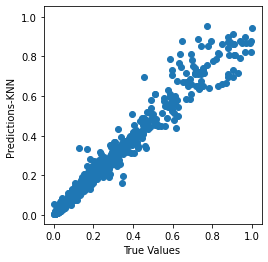

In [ ]:
#plot 

#pred_y_knn
#y_pred_reg
g=plt.scatter(validate_Y, pred_y_knn)
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions-KNN ')
g.axes.axis('equal')
g.axes.axis('square')



(-0.049362058712223614,
 2.2315592976842717,
 -0.22219593190847822,
 2.058725424488017)

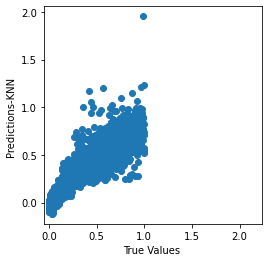

In [ ]:

h=plt.scatter(y_test, y_pred_reg)
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
h.axes.set_xlabel('True Values ')
h.axes.set_ylabel('Predictions-KNN ')
h.axes.axis('equal')
h.axes.axis('square')


#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [47]:
# Run some setup code for this notebook.
 # Import necessary statements 
from sklearn import preprocessing
import sklearn
import random
from numpy.random import permutation
import pandas as pd
import numpy as np 
from math import sqrt 
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import math
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
%matplotlib inline
import random
import os
 
 
from __future__ import print_function
 
from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform
 
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
 
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-09 08:43:59--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  73.1MB/s    in 2.2s    

2021-02-09 08:44:02 (73.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [49]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y
 
def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte
 
 
cifar10_dir = 'cifar-10-batches-py'
 
# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass
 
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
 
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

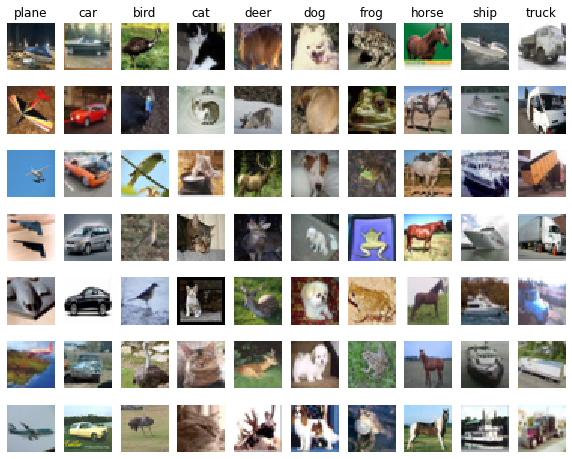

In [50]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [51]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [52]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!

# Reference: https://stackoverflow.com/questions/57689701/how-to-efficiently-compute-an-l2-distance-between-rows-of-two-array-using-only-b?noredirect=1&lq=1


class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass
    
    def train(self,X_train,y_train):
      self.X_train=X_train
      self.y_train=y_train

    def compute_distances_two_loops(self,X_test):
      no_of_train=self.X_train.shape[0]
      no_of_test=X_test.shape[0]
      distances=np.zeros((no_of_test,no_of_train))
      for i in range(no_of_test):
        for j in range(no_of_train):
          distances[i,j] = np.sqrt(np.sum(np.square(X_test[i,:]-self.X_train[j,:])))

      return distances

    def compute_distances_one_loops(self,X_test): # Reference:https://stackoverflow.com/questions/57689701/how-to-efficiently-compute-an-l2-distance-between-rows-of-two-array-using-only-b?noredirect=1&lq=1
      no_of_train=self.X_train.shape[0]
      no_of_test=X_test.shape[0]
      distances=np.zeros((no_of_test,no_of_train))
      for i in range(no_of_test):
        distances[i,:] = np.sqrt(np.sum(np.square(X_test[i,:]-self.X_train),axis=1))
      return distances

    def compute_distances_no_loops(self,X_test):     # Reference:https://stackoverflow.com/questions/57689701/how-to-efficiently-compute-an-l2-distance-between-rows-of-two-array-using-only-b?noredirect=1&lq=1
      no_of_train=self.X_train.shape[0]
      no_of_test=X_test.shape[0]
      distances=np.zeros((no_of_test,no_of_train))
      distances= np.sqrt((X_test**2).sum(axis=1)[:, np.newaxis] + (self.X_train**2).sum(axis=1) - 2 * X_test.dot(self.X_train.T))
      return distances
    
    def __vote__majority(self,nearest_neighbors):
                                                             #print(nearest_neighbors)
      counts = np.bincount(nearest_neighbors.astype('int'))
                                                            #print(counts)
                                                            #print(counts.argmax())
      return counts.argmax()

    def predict_labels(self,dists, k=1):
      test_size=dists.shape[0]
      y_pred=np.zeros(test_size,dtype=self.y_train.dtype)
      for i in range(test_size):
        min_ind=np.argsort(dists[i])[:k]
        K_nearest_neighbors=[ self.y_train[l] for l in  min_ind]   # actually calculated each test data with every train data
                                                                  # so we need to take indices of the train data that are near to the particular test data row/instance/point
        #print(K_nearest_neighbors)
        y_pred[i]=self.__vote__majority(np.array(K_nearest_neighbors))
      
      return y_pred

      
    

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [35]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [36]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 5000)


Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [37]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)

accuracy = float(num_correct) / num_test

print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [38]:
# Use this cell to compute accuracies for k = 3, 5, 7
from prettytable import PrettyTable
k_values=[1,3,5,7]
k_val_accuracies=[]
for i in k_values:
  #dists = classifier.compute_distances_two_loops(X_test)
  y_test_pred = classifier.predict_labels(dists, k=i)

  # Compute and print the fraction of correctly predicted examples
  num_correct = np.sum(y_test_pred == y_test)

  k_val_accuracies.append(float(num_correct) / num_test)

y = PrettyTable()

y.field_names = ["K Value", "Accuracy"]
for j,l in enumerate(k_val_accuracies):
  y.add_row([k_values[j],l])

print(y)



+---------+----------+
| K Value | Accuracy |
+---------+----------+
|    1    |  0.274   |
|    3    |  0.272   |
|    5    |  0.278   |
|    7    |  0.274   |
+---------+----------+


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [39]:
# Use this cell to call the functions
from prettytable import PrettyTable

knnClass = KNearestNeighbor()
knnClass.train(X_train, y_train)

accuracy_values=[]

one_dists = knnClass.compute_distances_one_loops(X_test)
#print(dists.shape)

y_test_pred = knnClass.predict_labels(one_dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)

accuracy_values.append(float(num_correct) / num_test)

#print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy[0]))




In [40]:
no_dists = knnClass.compute_distances_no_loops(X_test)
#print(dists.shape)

y_test_pred = knnClass.predict_labels(no_dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)

accuracy_values.append(float(num_correct) / num_test)

#print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy[1]))

In [41]:
z = PrettyTable()

z.field_names = ["K Value", "Accuracy"]
for l in accuracy_values:
  z.add_row(["1",l])

print(z)

+---------+----------+
| K Value | Accuracy |
+---------+----------+
|    1    |  0.274   |
|    1    |  0.274   |
+---------+----------+


Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [42]:
# Use this cell to present your timing results for computing distance matrix
import time

knnClass2 = KNearestNeighbor()
knnClass2.train(X_train, y_train)


distance_method_time=[]

k_times=[]

k_val_accuracies=[]
k_values=[1,3,5,7]
start = time.time()
two_dist=knnClass2.compute_distances_two_loops(X_test)
end = time.time()
distance_method_time.append(end-start)


for i in k_values:
  #dists = classifier.compute_distances_two_loops(X_test)

  start = time.time()
  y_test_pred = knnClass2.predict_labels(two_dist, k=i)

  # Compute and print the fraction oend = time.time()f correctly predicted examples
  num_correct = np.sum(y_test_pred == y_test)

  k_val_accuracies.append(float(num_correct) / num_test)
  end = time.time()
  k_times.append(end-start)

start = time.time()
one_dist=knnClass2.compute_distances_one_loops(X_test)
end = time.time()
distance_method_time.append(end-start)


for i in k_values:
  #dists = classifier.compute_distances_two_loops(X_test)

  start = time.time()
  y_test_pred = knnClass2.predict_labels(one_dist, k=i)

  # Compute and print the fraction oend = time.time()f correctly predicted examples
  num_correct = np.sum(y_test_pred == y_test)

  k_val_accuracies.append(float(num_correct) / num_test)
  end = time.time()
  k_times.append(end-start)

start = time.time()
no_dist=knnClass2.compute_distances_one_loops(X_test)
end = time.time()
distance_method_time.append(end-start)


for i in k_values:
  #dists = classifier.compute_distances_two_loops(X_test)

  start = time.time()
  y_test_pred = knnClass2.predict_labels(no_dist, k=i)

  # Compute and print the fraction oend = time.time()f correctly predicted examples
  num_correct = np.sum(y_test_pred == y_test)

  k_val_accuracies.append(float(num_correct) / num_test)
  end = time.time()
  k_times.append(end-start)




In [43]:
y = PrettyTable()

y.field_names = ["distance metric","Time for distance calculation", "k=1","k=3","k=5","k=7"]
y.add_row(["two_loops",distance_method_time[0],k_times[0],k_times[1],k_times[2],k_times[3]])
y.add_row(["one_loops",distance_method_time[1],k_times[4],k_times[5],k_times[6],k_times[7]])
y.add_row(["no_loops",distance_method_time[2],k_times[8],k_times[9],k_times[10],k_times[11]])

print(y)

+-----------------+-------------------------------+---------------------+---------------------+---------------------+---------------------+
| distance metric | Time for distance calculation |         k=1         |         k=3         |         k=5         |         k=7         |
+-----------------+-------------------------------+---------------------+---------------------+---------------------+---------------------+
|    two_loops    |       37.04943299293518       |  0.2059016227722168 |  0.2068040370941162 | 0.20520353317260742 |  0.2060248851776123 |
|    one_loops    |       33.97467756271362       | 0.20857906341552734 | 0.20714926719665527 | 0.21083641052246094 | 0.20760703086853027 |
|     no_loops    |       33.92679572105408       | 0.20443105697631836 | 0.20369243621826172 | 0.20546317100524902 | 0.20586490631103516 |
+-----------------+-------------------------------+---------------------+---------------------+---------------------+---------------------+


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [44]:
# Use this cell to implement Cross Validation

from sklearn.model_selection import KFold

no_folds=5

kfolds = KFold(no_folds, True)
import time

k=[1,3,5,7]

#
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]


num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

X=np.append(X_train,X_test,axis=0)
y=np.append(y_train,y_test,axis=0)
data=np.column_stack((X,y))


#KNearestNeighbor
k__accuracies=[]
avg_k_accu=[]
std_k=[]
for i in k:
  for train, test in kfolds.split(data):
    
    X_train=data[train][:,:-1]
    y_train=data[train][:,-1]
    X_test=data[test][:,:-1]
    y_test=data[test][:,-1]
    

    cls = KNearestNeighbor()
    cls.train(X_train, y_train)
    no_dists = cls.compute_distances_no_loops(X_test)
    
    start = time.time()
    y_test_pred = cls.predict_labels(no_dists, k=i)

    # Compute and print the fraction oend = time.time()f correctly predicted examples
    num_correct = np.sum(y_test_pred == y_test)

    k__accuracies.append(float(num_correct) / num_test)
    end = time.time()
  a=np.array(k__accuracies)

  avg_k_accu.append(np.mean(a))
  std_k.append(np.std(a))

  k__accuracies.clear()





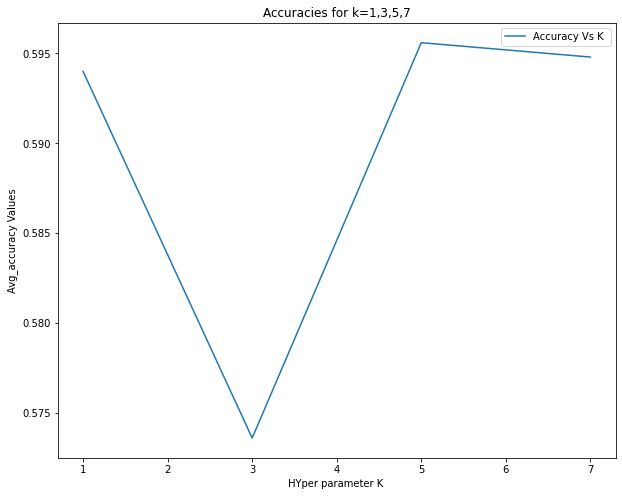

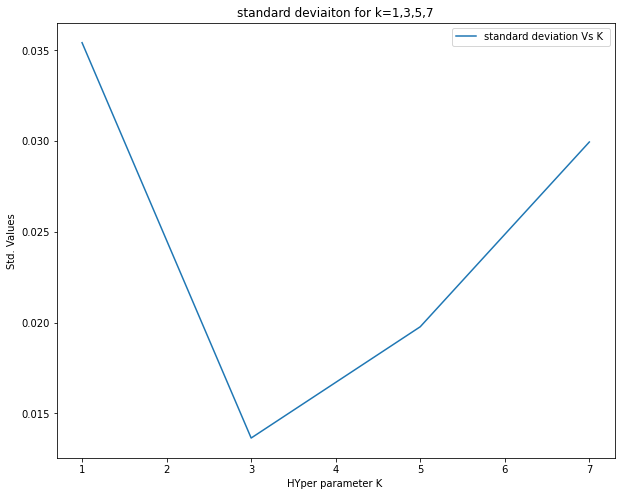

In [45]:
plt.title('Accuracies for k=1,3,5,7')
plt.plot(np.array(k),np.array(avg_k_accu), label='Accuracy Vs K ')
plt.legend()
plt.xlabel('HYper parameter K ')
plt.ylabel('Avg_accuracy Values')
plt.show()

plt.title('standard deviaiton for k=1,3,5,7')
plt.plot(np.array(k),np.array(std_k), label='standard deviation Vs K ')
plt.legend()
plt.xlabel('HYper parameter K ')
plt.ylabel('Std. Values')
plt.show()

###As we can see from the above two graphs best value of k can be found at K=5 since the average accuracy is maximum and the standard deviation is minimum at that point. 

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




In [54]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y
 
def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte
 
 
cifar10_dir = 'cifar-10-batches-py'
 
# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass
 
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
 
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [55]:
#1)Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Wh


#:reference:https://stackoverflow.com/questions/41979481/mean-pixel-subtraction-for-numpy-array

X_train=X_train-X_train.mean(axis=(0,-2,-1),keepdims=1)

X_test=X_test-X_test.mean(axis=(0,-2,-1),keepdims=1)

# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)




(5000, 3072) (500, 3072)


In [56]:
from prettytable import PrettyTable

cls3 = KNearestNeighbor()
cls3.train(X_train, y_train)

no_dists = cls3.compute_distances_no_loops(X_test)

k_values=[1,3,5,7]
k_val_accuracies=[]

for i in k_values:

  #dists = classifier.compute_distances_two_loops(X_test)

  y_test_pred = cls3.predict_labels(no_dists, k=i)

  # Compute and print the fraction of correctly predicted examples
  num_correct = np.sum(y_test_pred == y_test)

  k_val_accuracies.append(float(num_correct) / num_test)

y = PrettyTable()

y.field_names = ["K Value", "Accuracy"]
for j,l in enumerate(k_val_accuracies):
  y.add_row([k_values[j],l])

print(y)

+---------+----------+
| K Value | Accuracy |
+---------+----------+
|    1    |  0.274   |
|    3    |  0.276   |
|    5    |  0.278   |
|    7    |  0.272   |
+---------+----------+


### For the first question where we subtract mean from each image. The accuracy for k=3 increased by a tad but all accuracies almost remain same

In [ ]:
#2)Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?



### 3) KNN algorithms usually doesnot take time to train as we are just storing the values of training data set. For testing time complexity of the Knn classifier(since I implemented naive approach) will be `O(n*d)` considering `n` training samples and `d` dimensions. Usually it is a non linear classifier. We can state a linear classifier is one which tries to seperate the classes based on the hyper plane like linear regression or SVMS. In Knn we don't have any hyperplanes we only have points in some clusters or dense regions and we are simply considering the class of majority of K neighbors

# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [101]:
from sklearn import preprocessing
import sklearn
import random
from numpy.random import permutation
import pandas as pd
import numpy as np 
from math import sqrt 
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import math
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
%matplotlib inline
import random
import os
from math import log

In [102]:

headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [103]:
data.head()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [104]:
X=data.values
#y=data.values[:,-1]
header=headers[:-1]


train, test= train_test_split(X, test_size=0.2, random_state=1)
y_train=train[:,-1]
y_test=test[:,-1]

In [105]:

def is_numeric(value):
    
    return isinstance(value, int) or isinstance(value, float)


class Question:
    

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [106]:
#Reference :https://www.youtube.com/watch?v=LDRbO9a6XPU
# Most of the implementation was learned from the above video


def class_counts(rows):
    
  counts = {}  
  for row in rows:
      
      label = row[-1]
      if label not in counts:
          counts[label] = 0
      counts[label] += 1
  return counts

def partition(rows, question):
  
  true_rows, false_rows = [], []
  for row in rows:
      if question.match(row):
          true_rows.append(row)
      else:
          false_rows.append(row)
  return true_rows, false_rows


def mis_calc(rows):   # http://users.umiacs.umd.edu/~joseph/classes/enee752/Fall09/solutions3.pdf
  
  labels=[row[-1] for row in rows]
  n_labels=len(labels)
  counts = np.bincount(labels)
  probs = counts / n_labels
  error=1-max(probs)
  return error

    


def entropy(rows):    #https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python
    labels=[row[-1] for row in rows]
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.bincount(labels)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)
    #print(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    for i in probs:
      if i>0:
        ent -= i * log(i, n_classes)

    return ent


def gini(rows):
  
  counts = class_counts(rows)
  impurity = 1
  for lbl in counts:
      prob_of_lbl = counts[lbl] / float(len(rows))
      impurity -= prob_of_lbl**2
  return impurity
  
def info_gain_gini(left, right, current_uncertainty):
   
  p = float(len(left)) / (len(left) + len(right))
  return current_uncertainty - p * gini(left) - (1 - p) * gini(right)


def info_gain_entropy(left, right, current_uncertainty):

  p = float(len(left)) / (len(left) + len(right))
  return current_uncertainty - p * entropy(left) - (1 - p) * entropy(right)

def info_gain_mis_calc(left, right, current_uncertainty):

  p = float(len(left)) / (len(left) + len(right))
  return current_uncertainty - p * mis_calc(left) - (1 - p) * mis_calc(right)


def find_best_split(rows,metric):
    
  best_gain = 0  
  best_question = None  
  current_uncertainty=0
  if metric=="gini":
    current_uncertainty = gini(rows)

  if metric=="mis_calc":
    current_uncertainty=mis_calc(rows)

  if metric=="entropy":
    current_uncertainty=entropy(rows)

  n_features = len(rows[0]) - 1  

  for col in range(n_features): 

      values = set([row[col] for row in rows]) 

      for val in values:  

          question = Question(col, val)

        
          true_rows, false_rows = partition(rows, question)

          
          if len(true_rows) == 0 or len(false_rows) == 0:
              continue

          gain=0

          if metric=="gini":
            gain = info_gain_gini(true_rows, false_rows, current_uncertainty)

          if metric=="mis_calc":
            gain = info_gain_mis_calc(true_rows, false_rows, current_uncertainty)

          if metric=="entropy":
        
            gain = info_gain_entropy(true_rows, false_rows, current_uncertainty)


          if gain >= best_gain:
              best_gain, best_question = gain, question

  return best_gain, best_question
  

class Leaf:

  def __init__(self, rows):
      self.predictions = class_counts(rows)


class DecisionNode:

  def __init__(self,question,true_branch,false_branch):
      self.question = question
      self.true_branch = true_branch
      self.false_branch = false_branch


class DecisionTree:

  def __int__(self):
    pass

  def fit(self,rows,metric):
      
    gain, question = find_best_split(rows,metric)


    if gain == 0:
      return Leaf(rows)


    true_rows, false_rows = partition(rows, question)


    true_branch = self.fit(true_rows,metric)


    false_branch = self.fit(false_rows,metric)


    return DecisionNode(question, true_branch, false_branch)

  def print_tree(self,node, spacing=""):
    

    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    
    print (spacing + str(node.question)+"\n")


    print (spacing + 'Label: True: Branch')
    self.print_tree(node.true_branch, spacing + "  ")

    print (spacing + 'Label: False: Branch')
    self.print_tree(node.false_branch, spacing + "  ")



  def print_tree_to_File(self,node,file, spacing=""):
    

    if isinstance(node, Leaf):
      file.write (spacing + "Predict-- "+ str(node.predictions)+"\n")
      return

    
    file.write(spacing + str(node.question)+'\n')


    file.write(spacing + 'Label: True: Branch'+"\n")
    self.print_tree_to_File(node.true_branch,file, spacing + "  ")

    file.write(spacing + 'Label: False:'+"\n")
    self.print_tree_to_File(node.false_branch,file, spacing + "  ")

  def get_leaf(self,counts):
    
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

  def classify(self,row,node):

    if isinstance(node, Leaf):
        return node.predictions

    if node.question.match(row):
        return self.classify(row, node.true_branch)
    else:
        return self.classify(row, node.false_branch)

  def predict(self,rows,node):
    correct=0
    for row in rows:
      counts=self.get_leaf(self.classify(row,node))
      #print(counts)
      for key,values in counts.items():
        if values=="100%":
          correct+=1
    return (correct/len(rows))*100


1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [107]:
dt_misc=DecisionTree()
node_misc=dt_misc.fit(train,"mis_calc")


In [108]:
dt_gini=DecisionTree()
node_gini=dt_gini.fit(train,"gini")
#dt_gini.predict(test,node_gini)

In [109]:
dt_entropy=DecisionTree()
node_entropy=dt_entropy.fit(train,"entropy")
#dt_entropy.predict(test,node_entropy)

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [110]:
accuracies=[]

accuracies.extend([dt_misc.predict(test,node_misc),dt_gini.predict(test,node_gini),dt_entropy.predict(test,node_entropy)])

d = PrettyTable()

d.field_names = ["metric","Accuracy%"]
d.add_row(["miscalculation rate",accuracies[0]])
d.add_row(["Gini impurity",accuracies[1]])
d.add_row(["Entropy",accuracies[1]])


print(d)

+---------------------+--------------------+
|        metric       |     Accuracy%      |
+---------------------+--------------------+
| miscalculation rate | 13.571428571428571 |
|    Gini impurity    |       100.0        |
|       Entropy       |       100.0        |
+---------------------+--------------------+


1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

1. e) Does standardisation and normalisation help in this case? Report

Answer: Standardisation and normalisation has no impact on this and neither are they useful. since it is just calculating entropy or gini index based on the probability counts of classes.

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [111]:
from sklearn import tree

accuracy2=[]

clf=tree.DecisionTreeClassifier(criterion="gini")
clf=clf.fit(train,y_train)
score=clf.score(test,y_test)
#print(dt_gini.predict(test,node_entropy))
accuracy2.append(score*100)


clf1=tree.DecisionTreeClassifier(criterion="entropy")
clf1=clf1.fit(train,y_train)
score=clf1.score(test,y_test)
#print(dt_gini.predict(test,node_entropy))
accuracy2.append(score*100)



In [112]:
s = PrettyTable()

s.field_names = ["metric","From Scratch","sklearn"]
s.add_row(["miscalculation rate",accuracies[0],""])
s.add_row(["Gini impurity",accuracies[1],accuracy2[0]])
s.add_row(["Entropy",accuracies[1],accuracy2[1]])


print(s)

+---------------------+--------------------+---------+
|        metric       |    From Scratch    | sklearn |
+---------------------+--------------------+---------+
| miscalculation rate | 13.571428571428571 |         |
|    Gini impurity    |       100.0        |  100.0  |
|       Entropy       |       100.0        |  100.0  |
+---------------------+--------------------+---------+


3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

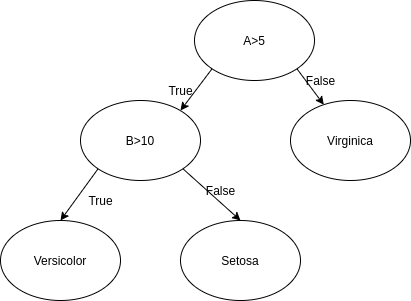
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [113]:
with open("outputimp.txt",'w') as f:
  dt_gini.print_tree_to_File(node_gini,f)

4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

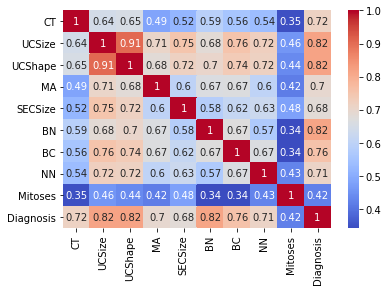

In [114]:
import seaborn as sn
import matplotlib.pyplot as plt


corrMatrix=data.corr()

sn.heatmap(corrMatrix, annot=True,cmap="coolwarm")
plt.show()


From the above correlation matrix we can conclude that (UCsize,UCShape),(Mitoses,BC), (Mitoses,BN), (Mitoses,CT). So, we will drop those features and retain the remaining.

In [115]:
data=data.drop(['UCSize', 'UCShape','Mitoses','BN','CT'], axis = 1) 


In [116]:
X=data.values
#y=data.values[:,-1]
header=headers[:-1]


train, test= train_test_split(X, test_size=0.2, random_state=1)
y_train=train[:,-1]
y_test=test[:,-1]



dt_misc1=DecisionTree()
node_misc=dt_misc1.fit(train,"mis_calc")


dt_gini1=DecisionTree()
node_gini=dt_gini1.fit(train,"gini")
#dt_gini.predict(test,node_gini)

dt_entropy1=DecisionTree()
node_entropy=dt_entropy1.fit(train,"entropy")
#dt_entropy.predict(test,node_entropy)

accuracies=[]

accuracies.extend([dt_misc.predict(test,node_misc),dt_gini.predict(test,node_gini),dt_entropy.predict(test,node_entropy)])

b = PrettyTable()

b.field_names = ["metric","Accuracy%"]
b.add_row(["miscalculation rate",accuracies[0]])
b.add_row(["Gini impurity",accuracies[1]])
b.add_row(["Entropy",accuracies[1]])


print(b)

+---------------------+-------------------+
|        metric       |     Accuracy%     |
+---------------------+-------------------+
| miscalculation rate | 6.428571428571428 |
|    Gini impurity    |       100.0       |
|       Entropy       |       100.0       |
+---------------------+-------------------+


As you can see the accuracies for the gini impurity and the entropy remains the same and the miscalculation rate accuracy 
decreases 

5. Report the advantages and disadvantages of decision trees based on the above question.

##Answer:

###Advantages:
1.   Decision tree requires less data
2.  Decision trees does not require Normalisation or scaling.
3.  Decision tree model is easy to implement and intuitive to understand


---



####DisAdvantages:


1.   A small change in data can cause a large change in the structure of the decision tree 
2.   Sometimes calculations can be complex related to information gain.













